In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal

from f0detectionyin_gabi import f0detectionyin
from sinemodel import sinemodel
from harmonicmodel_gabi import harmonicmodel

In [2]:
N = 1024
t = -60
nH = 20
minf0 = 10
maxf0 = 4096
f0et = 5
maxhd = 2
filename = 'violin-B3'
DAFx_in, fs = sf.read(f'audios/{filename}.wav')
window = signal.windows.hann(N, sym=False)

In [3]:
f0 = f0detectionyin(DAFx_in, fs, N, minf0, maxf0)
print(f0)

246.64395676680127


In [4]:
DAFx_out_sinemodel = sinemodel(DAFx_in, window, N, t)
sf.write(f'audios/{filename}_sinemodel.wav', DAFx_out_sinemodel, fs)

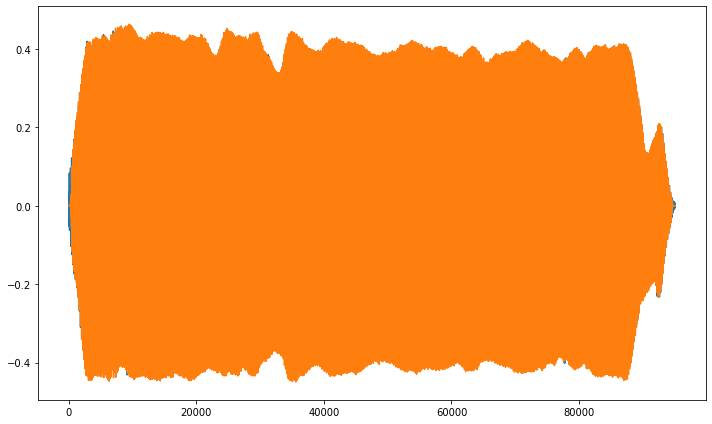

In [5]:
plt.figure(figsize=(10, 6))
# plt.subplot(121)
plt.plot(DAFx_in)
# plt.subplot(122)
plt.plot(DAFx_out_sinemodel)
plt.tight_layout()

In [6]:
DAFx_out_harmonicmodel = harmonicmodel(DAFx_in, fs, window, N, t, nH, minf0, maxf0, f0et, maxhd)
sf.write(f'audios/{filename}_harmonicmodel.wav', DAFx_out_harmonicmodel, fs)

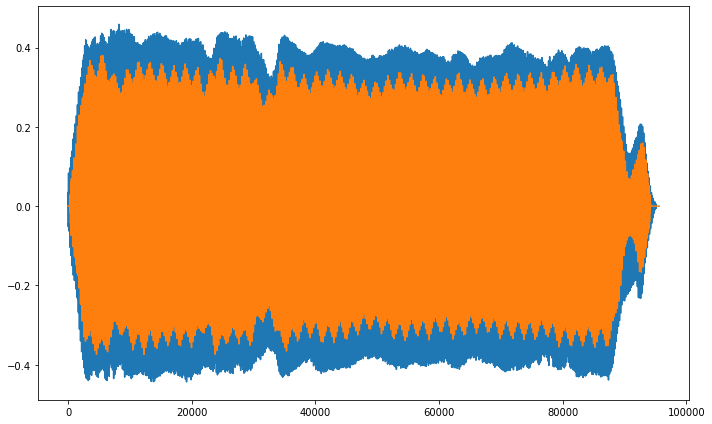

In [7]:
plt.figure(figsize=(10, 6))
# plt.subplot(121)
plt.plot(DAFx_in)
# plt.subplot(122)
plt.plot(DAFx_out_harmonicmodel)
plt.tight_layout()